In [18]:
import time
import pickle
import re
import timeit
import pandas as pd

from konlpy.tag import Kkma, Komoran, Okt
from eunjeon import Mecab

with open('word_dict.pkl','rb') as f:
    stopwords = pickle.load(f)
    
company = pd.read_csv('../raw/19년 1월 2일 기준(코스피).csv',encoding='utf-8')
company_list = company.iloc[:100,]['종목명'][0:100]# 시총 상위 100개 기업 리스트
total_df = pd.DataFrame(columns=['Company','Day','Main','Head'])

list_del= ['기사','기자','신문','네이버','뉴스','연합뉴스','하이닉스','텔레콤','사진','데일리','가운데','구독',\
            '이날','이후','지난해','최근','삼성'] + company_list.to_list()
stopwords += list_del 

nouns_processors= [('mecab', Mecab()),('Kkma', Kkma()), ('Komoran', Komoran()), ('Okt', Okt())]

In [19]:
for name, nouns_processor in nouns_processors:
    start_time = timeit.default_timer()

    df = pd.read_csv("../raw/새로 만든 전처리/삼성증권_전처리.csv",encoding='utf-8')
    df.dropna(axis=0,inplace=True)
    df['Day']=df['Day'].str[:10]
    d = df.groupby(['Day'])['Head_after'].apply(' '.join).reset_index()
    e = df.groupby(['Day'])['Main_after'].apply(' '.join).reset_index()
    f = pd.merge(e,d,on='Day')
    temp_pd = pd.DataFrame()    
    a = f['Main_after'][0:1]
    temp_list_main = []
    for i, news in enumerate(a):
        b = nouns_processor.nouns('%s' %news)
        clean_words = []
        for word in b:
            if len(word) < 2:
                continue
            if word not in stopwords:
                clean_words.append(word)
        c = ' '.join(clean_words)
        temp_list_main.append(c)
    terminate_time = timeit.default_timer()
    print("%s의 삼성증권 Main 처리 시간 : %f초" % (name,terminate_time - start_time))
    
    start_time = timeit.default_timer()  
    aa = f['Head_after'][0:1]
    temp_list_head = []
    for i, news in enumerate(a):
        b = nouns_processor.nouns('%s' %news)
        clean_words = []
        for word in b:
            if len(word) < 2:
                continue
            if word not in stopwords:
                clean_words.append(word)
        c = ' '.join(clean_words)
        temp_list_head.append(c)
    terminate_time = timeit.default_timer()
    print("%s의 삼성증권 Head 처리 시간 : %f초" % (name,terminate_time - start_time))

mecab의 삼성증권 Main 처리 시간 : 0.997352초
mecab의 삼성증권 Head 처리 시간 : 0.251936초
Kkma의 삼성증권 Main 처리 시간 : 76.845870초
Kkma의 삼성증권 Head 처리 시간 : 76.187692초
Komoran의 삼성증권 Main 처리 시간 : 106.100810초
Komoran의 삼성증권 Head 처리 시간 : 107.954053초
Okt의 삼성증권 Main 처리 시간 : 5.584756초
Okt의 삼성증권 Head 처리 시간 : 5.581646초


In [59]:
index_name = ['Mecab','Kkma','Komoran','Okt']
df_graph = pd.DataFrame({"Main":[0.997352,76.845870,106.1008102,5.584756], "Head":[0.251936,76.187692,107.954053,5.581646]},index=index_name)
#df_graph["Main"] = np.log1p(df_graph["Main"])
#df_graph["Head"] = np.log1p(df_graph["Head"])
df_graph

,Main,Head
Mecab,0.997352,0.251936
Kkma,76.845870,76.187692
Komoran,106.100810,107.954053
Okt,5.584756,5.581646


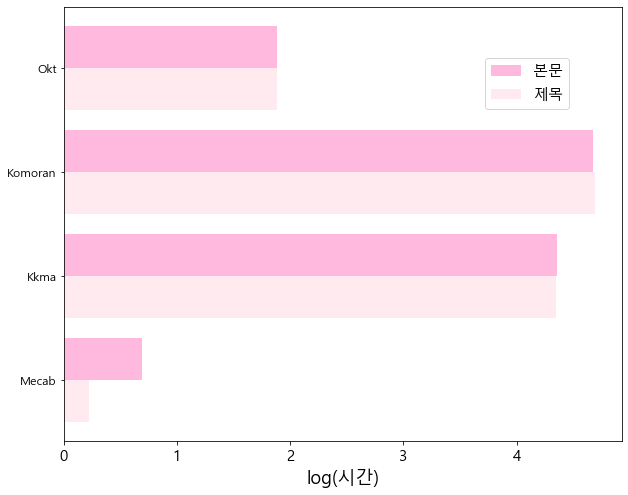

In [58]:
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fm = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'

# 1. 기본 스타일 설정
#plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 15
# 3. 그래프 그리기

index = np.arange(4)/2

label=['Mecab','Kkma','Komoran','Okt']

ax = plt.subplot()
p1 =ax.barh(index+0.1,df_graph["Main"],height=0.2,color='deeppink', label='본문', alpha=0.3)
p2 =ax.barh(index-0.1,df_graph["Head"], height=0.2,  color='pink', label='제목', alpha=0.3)

plt.xlabel('log(시간)', fontsize=18)


plt.legend((p1[0], p2[0]), ('본문', '제목'),loc='upper center', ncol=1, bbox_to_anchor=(0.83, 0.9), fontsize=15)


plt.yticks(index, label,fontsize=12)

plt.show()

In [60]:
#!/usr/bin/env python
import psutil
# gives a single float value
psutil.cpu_percent()
# gives an object with many fields
psutil.virtual_memory()
# you can convert that object to a dictionary 
dict(psutil.virtual_memory()._asdict())

{'total': 68650217472,
 'available': 56716427264,
 'percent': 17.4,
 'used': 11933790208,
 'free': 56716427264}